Convolutions are an old mathematical concept. Altough the term itself did not come into wide use until the 1950s or 1960s, the definition essentially goes back to works of **D'Alembert**, **Lacroix**, **Laplace**, **Fourier**, **Poisson**, and others.

In the field Computer Science, the relevance of Convolutions for signal and image processing was recognized well before the advent of CNNs. In particular you can find functions computing convolutions in any library for image provessing, such ad **OpenCv**, or any software for image manipulation, such as **Gimp** or others.

We are mostly interested in discrete convolutions, and in particular in convolution f*g where the filter (aka kernel) g is finite.

**For the purposes of this notebook, we shall use perform convolutions through a convolutional layer.**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, ZeroPadding2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
myconvlayer = Conv2D(filters=1, kernel_size=(3,3),use_bias=False)  # or simply Conv2D(1,(3,3),use_bias=False)

(28, 28)


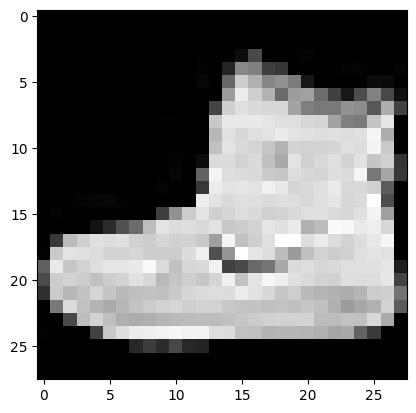

In [ ]:
im = x_train[0]
print(im.shape)
plt.imshow(im,cmap='gray')

(1, 26, 26, 1)


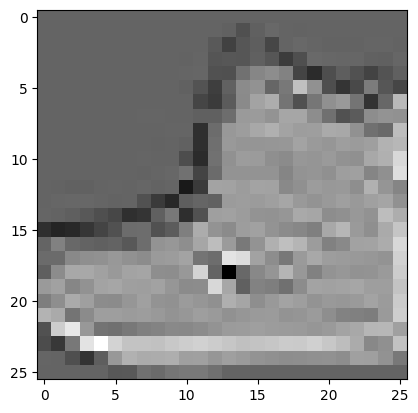

In [ ]:
out = myconvlayer(im.reshape(1,28,28,1))
print(out.shape)
plt.imshow(out[0,:,:,0],cmap='gray')

The kernel was initialized with random values, resulting in a "confused" version of the input.

Additionally, note that the output has dimensions 26x26, not 28x28 like the original input. This happens because, by default, the convolution operates in "valid" mode, meaning the kernel is applied only to full regions of the input.

If we want to apply the kernel to the entire image, including the borders, we need to pad the input images (typically with zeros). This can be achieved either through explicit padding mechanisms or by specifying padding='same' when creating the layer.

1
(3, 3, 1, 1)
[[ 0.5722331   0.35837126 -0.5398515 ]
 [-0.41405028  0.35217464  0.5730132 ]
 [ 0.08077103 -0.10889381 -0.46354452]]


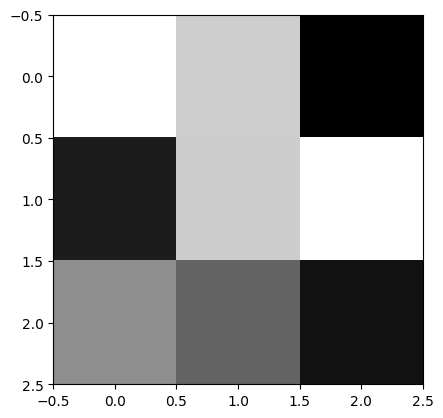

In [ ]:
weights = myconvlayer.get_weights()
print(len(weights))  #weights is a list (typically, weights and biases)
print(weights[0].shape)  #let's access the weights
plt.imshow(weights[0][:,:,0,0],cmap='gray')
print(weights[0][:,:,0,0])

The shape of weights is (3,3,1,1).

(3,3) are the spatial dimensions.

But what about the two other dimensions?

They are the **depth dimensions** of the **input** and of the **output**.

# Setting custom weights

We are now in the position of setting our weights in te kernel, and inspect thier effect on the result.

Let's define a simple function visualizing together input-output pairs.

In [ ]:
def plot_pairs(input,output):
  fig, ax = plt.subplots(1,2, figsize=(12,8))
  ax[0].imshow(input,cmap='gray')
  ax[1].imshow(output,cmap='gray')
  ax[0].axis('off')
  ax[1].axis('off')
  fig.tight_layout
  fig.show(9)

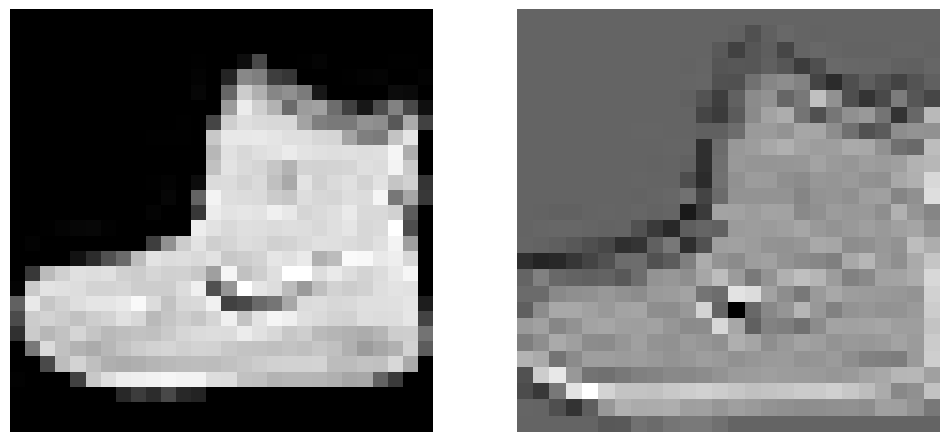

In [ ]:
plot_pairs(im,out[0,:,:,0])

# Identity and shift

Let us start with the identity kernel.

In [ ]:
k = np.zeros((3,3,1,1))
k[1,1,0,0] = 1
print(k[...,0,0])

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


In [ ]:
myconvlayer.set_weights([k])

(1, 26, 26, 1)


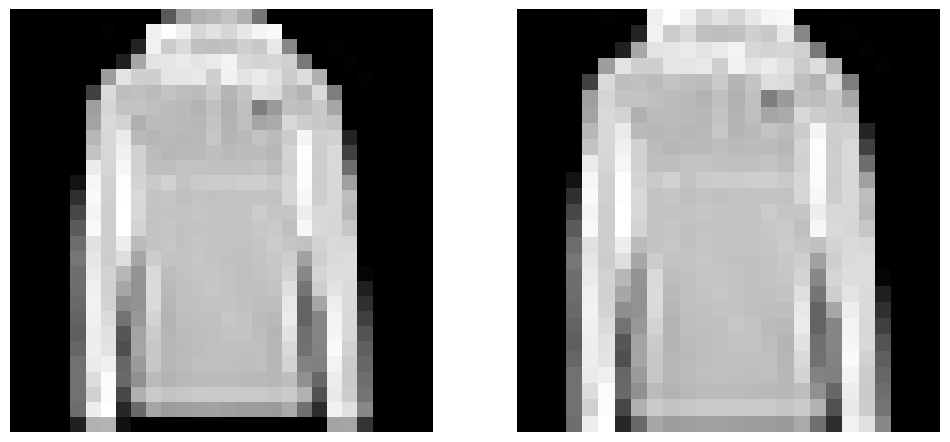

In [ ]:
i = 24 #np.random.randint(0,x_train.shape[0])
im = x_train[i]
out = myconvlayer(im.reshape(1,28,28,1))
plot_pairs(im,out[0,:,:,0])
print(out.shape)

In [ ]:
k = np.zeros((3,3,1,1))
k[1,0,0,0] = 1
print(k[...,0,0])

[[0. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]]


In [ ]:
myconvlayer.set_weights([k])

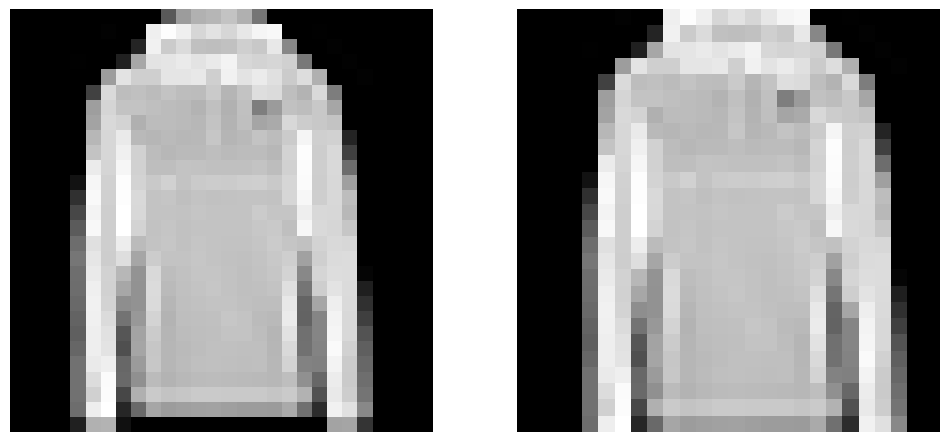

In [ ]:
i = 24 #np.random.randint(0,x_train.shape[0])
im = x_train[i]
out = myconvlayer(im.reshape(1,28,28,1))
plot_pairs(im,out[0,:,:,0])

# Derivatives

In [ ]:
k = np.zeros((3,3,1,1))
k[1,0,0,0] = -1
k[1,2,0,0] = 1
print(k[...,0,0])

[[ 0.  0.  0.]
 [-1.  0.  1.]
 [ 0.  0.  0.]]


In [ ]:
myconvlayer.set_weights([k])

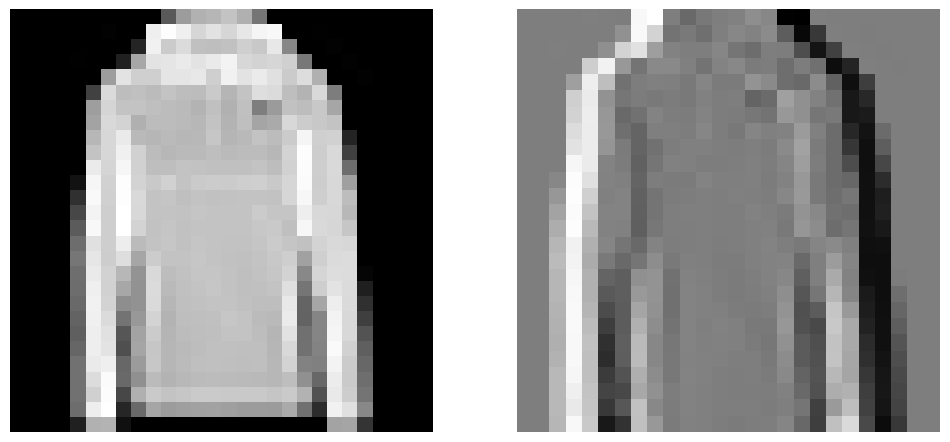

In [ ]:
i = 24 #np.random.randint(0,x_train.shape[0])
im = x_train[i]
out = myconvlayer(im.reshape(1,28,28,1))
plot_pairs(im,out[0,:,:,0])

An import property of convolutions is that f * k1 + f * k2 = f * (k1+k2), that is the sum of the results of two convolutions is equal to the convolution with the sum of the kernels (distributivity).

The output image of the previous kernel is the difference between the input image shifted to the left and the input image shifted to the right.

Let us consider the vertical derivative

In [ ]:
k = np.zeros((3,3,1,1))
k[0,1,0,0] = -1
k[2,1,0,0] = 1
print(k[...,0,0])

[[ 0. -1.  0.]
 [ 0.  0.  0.]
 [ 0.  1.  0.]]


In [ ]:
myconvlayer.set_weights([k])

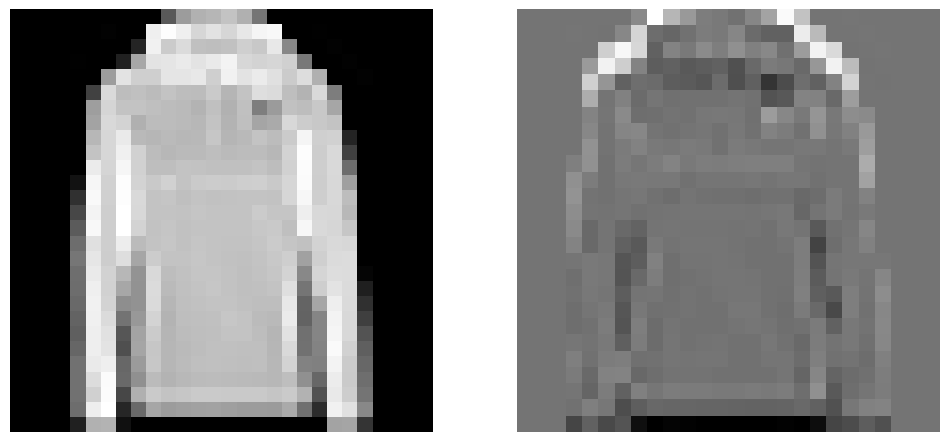

In [ ]:
i = 24 #np.random.randint(0,x_train.shape[0])
im = x_train[i]
out = myconvlayer(im.reshape(1,28,28,1))
plot_pairs(im,out[0,:,:,0])

# Blurring

In [ ]:
k = np.ones((3,3,1,1))/9
print(k[...,0,0])

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [ ]:
myconvlayer.set_weights([k])

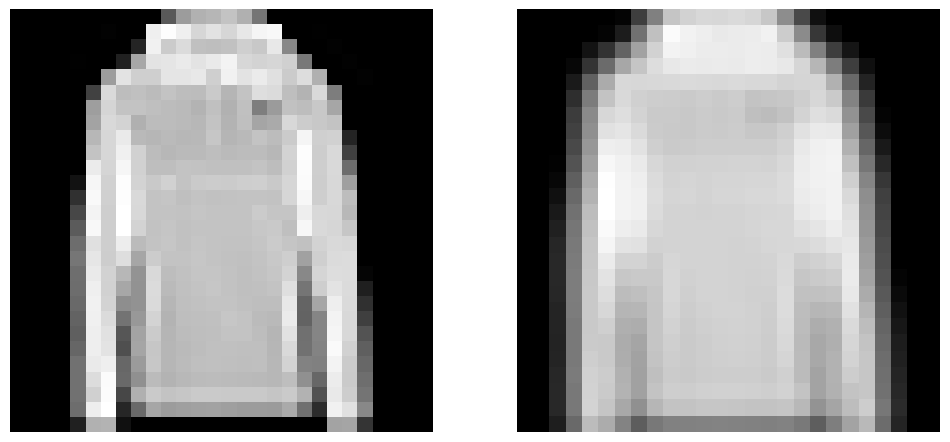

In [ ]:
i = 24 #np.random.randint(0,x_train.shape[0])
im = x_train[i]
out = myconvlayer(im.reshape(1,28,28,1))
plot_pairs(im,out[0,:,:,0])

# Edge detection

In [ ]:
k = np.zeros((3,3,1,1))
k[0,1,0,0] = k[1,0,0,0] = -1
k[2,1,0,0] = k[1,2,0,0] = -1
k[1,1,0,0] = 4
print(k[...,0,0])

[[ 0. -1.  0.]
 [-1.  4. -1.]
 [ 0. -1.  0.]]


In [ ]:
myconvlayer.set_weights([k])

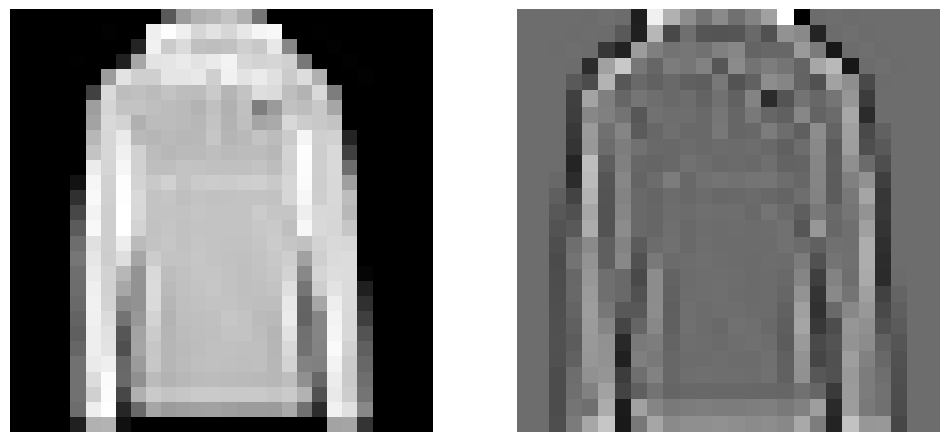

In [ ]:
i = 24 #np.random.randint(0,x_train.shape[0]) #24
im = x_train[i]
out = myconvlayer(im.reshape(1,28,28,1))
plot_pairs(im,out[0,:,:,0])

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving esher.png to esher.png


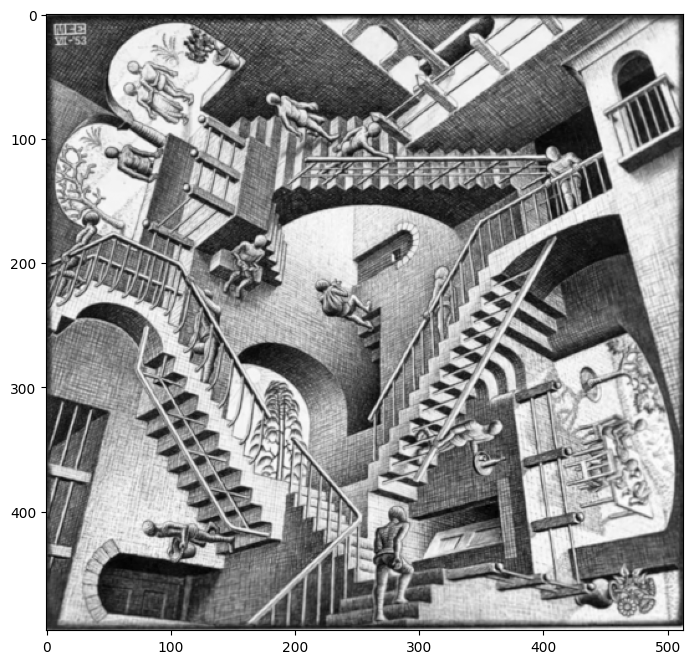

In [ ]:
import cv2
esher = cv2.imread('esher.png',cv2.IMREAD_GRAYSCALE)/255.
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, figsize=(12,8))

plt.imshow(esher,cmap='gray')

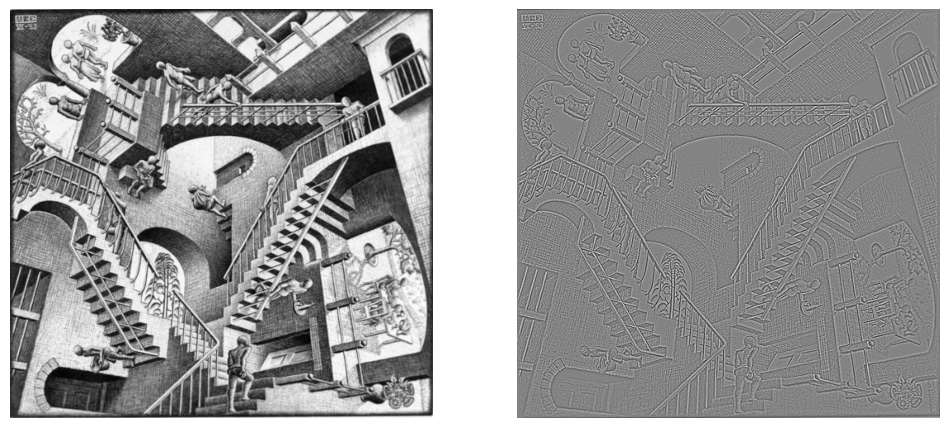

In [ ]:
out = myconvlayer(esher.reshape(1,esher.shape[0],esher.shape[1],1))
plot_pairs(esher,out[0,:,:,0])

Embossing

In [ ]:
k = np.array([[-2,-1,0],
              [-1,1,1],
              [0,1,2]]).reshape(3,3,1,1)

In [ ]:
myconvlayer.set_weights([k])

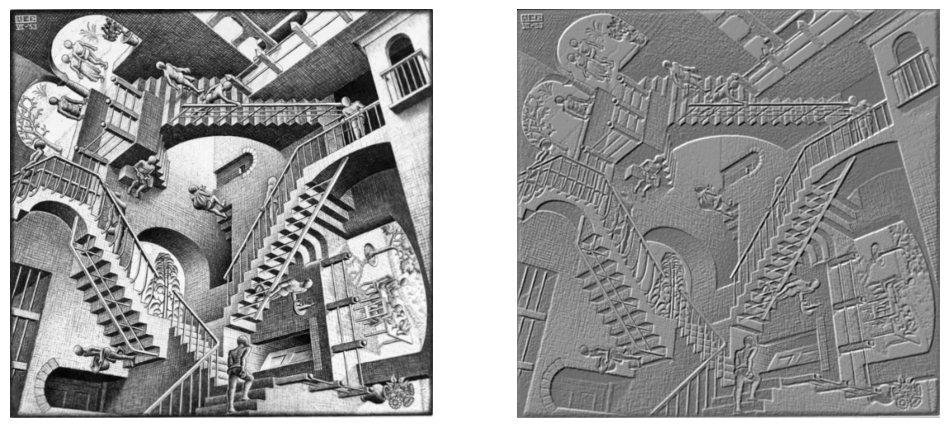

In [ ]:
out = myconvlayer(esher.reshape(1,esher.shape[0],esher.shape[1],1))
plot_pairs(esher,out[0,:,:,0])

# Stride

Stride refers to the step size by which a convolutional filter (or kernel) moves across the input image (or feature map) during the convolution operation.

The default stride is 1, resulting in an output image of approximately the same size as the input image (except for padding effects).

Increasing the stride leads to downsampling, as it reduces the number of times the kernel is applied, thereby decreasing the output dimensions. The output dimension is inversely proportional to the stride.

(496, 513)
(1, 247, 256, 1)


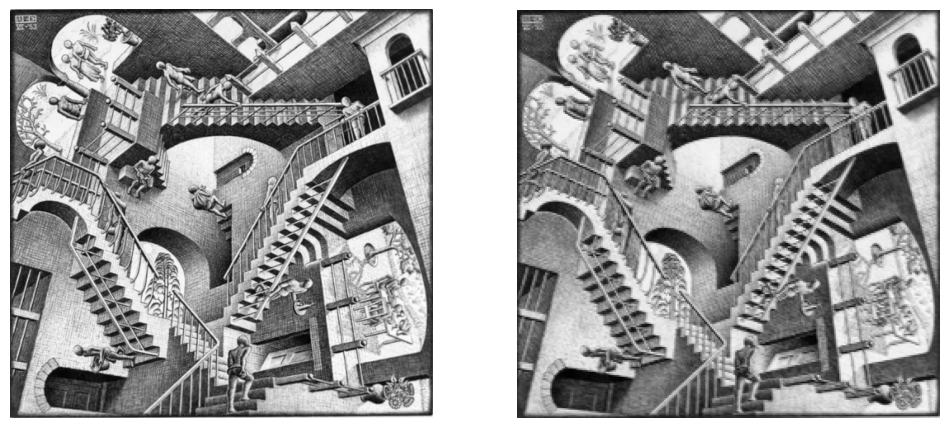

In [ ]:
myconvlayer2 = Conv2D(1,(3,3),use_bias=False, strides=(2,2))
out = myconvlayer2(esher.reshape(1,esher.shape[0],esher.shape[1],1))
print(esher.shape)
print(out.shape)
plot_pairs(esher,out[0,:,:,0])

We can also reduce the spatial dimensions with pooling layers. There are two kinds of pooling layers: MaxPooling (returing the max value in the kernel area), and AveragePooling, returing the average.

(496, 513)
(1, 248, 256, 1)


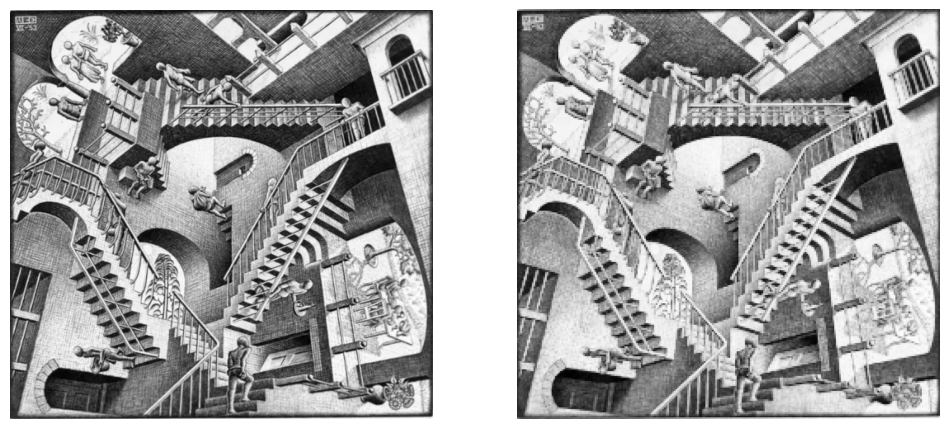

In [ ]:
out = MaxPooling2D((2,2))(esher.reshape(1,esher.shape[0],esher.shape[1],1))
print(esher.shape)
print(out.shape)
plot_pairs(esher,out[0,:,:,0])

In [ ]:
a = np.random.randint(0,100,(1,10,10,1))
print(a[0,:,:,0])

[[35 86 60 67 67 74 78 19 78 71]
 [90 57 82 36 18 80 47 57 63 45]
 [72 51 47  5 53 46 91 13  8 84]
 [51 29 96 90 90 93  2 46 91 24]
 [66 51 58 34 33 52 25 21 74 86]
 [78 39 19 87 94 35 23  7  5 87]
 [41 18 16 64 69  4 16 36 67 22]
 [43  4 53 70 27 40 51 26  8 85]
 [29 69  2  1 49 71 48 83 75 46]
 [25 37 49 93 63  5 74 27 95 65]]


In [ ]:
out = MaxPooling2D((2,2))(a)
print(out[0,:,:,0])

tf.Tensor(
[[90 82 80 78 78]
 [72 96 93 91 91]
 [78 87 94 25 87]
 [43 70 69 51 85]
 [69 93 71 83 95]], shape=(5, 5), dtype=int64)


# Upsampling

Upsampling can done in two ways: using Transposed Convolutions (morally equivalent to Convolutions with sub-unitarian stride), or with explicit Upasampling layers.

In [ ]:
outup = UpSampling2D(2)(out) #change interpolation to 'blinear'
print(outup.shape)
print(outup[0,:,:,0])

(1, 10, 10, 1)
tf.Tensor(
[[99 99 43 43 97 97 98 98 56 56]
 [99 99 43 43 97 97 98 98 56 56]
 [45 45 86 86 55 55 85 85 66 66]
 [45 45 86 86 55 55 85 85 66 66]
 [97 97 90 90 91 91 98 98 97 97]
 [97 97 90 90 91 91 98 98 97 97]
 [72 72 86 86 97 97 89 89 68 68]
 [72 72 86 86 97 97 89 89 68 68]
 [87 87 99 99 78 78 72 72 74 74]
 [87 87 99 99 78 78 72 72 74 74]], shape=(10, 10), dtype=int64)


(496, 513)
(1, 494, 511, 23)


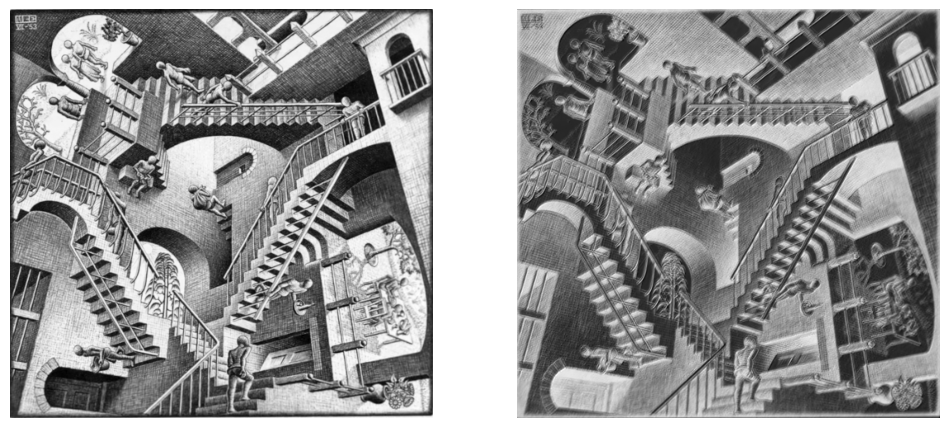

In [ ]:
myconvlayer3 = Conv2D(23,(3,3),use_bias=False)

out = myconvlayer3(esher.reshape(1,esher.shape[0],esher.shape[1],1))
print(esher.shape)
print(out.shape)
plot_pairs(esher,out[0,:,:,1])